# Email Spam Classification Using NLP

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_email = pd.read_csv("emails.csv")

In [3]:
df_email.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df_email.shape

(5728, 2)

In [5]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5728 non-null   object
 1   Spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df_email.describe()

,Spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df_email.isna().sum()

Text    0
Spam    0
dtype: int64

In [8]:
df_email['Spam'].unique()

array([1, 0], dtype=int64)

In [9]:
df_email['Spam'].value_counts()

0    4360
1    1368
Name: Spam, dtype: int64

<AxesSubplot:xlabel='Spam', ylabel='count'>

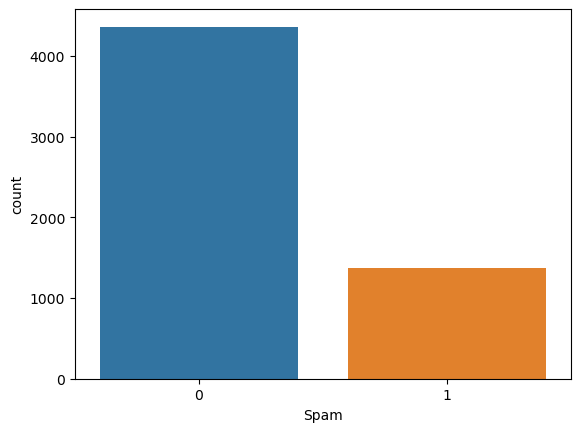

In [10]:
sns.countplot(df_email['Spam'])

## Text Preprocessing

In [11]:
import nltk

- **Tokenization**

In [12]:
from nltk import word_tokenize

def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [15]:
df_email['Count']=df_email['Text'].apply(count_words)
df_email.head()

,Text,Spam,Count
0,Subject: naturally irresistible your corporate...,1,325
1,Subject: the stock trading gunslinger fanny i...,1,90
2,Subject: unbelievable new homes made easy im ...,1,88
3,Subject: 4 color printing special request add...,1,99
4,"Subject: do not have money , get software cds ...",1,53


In [16]:
df_email['Count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: Count, Length: 5728, dtype: int64

In [17]:
df_email.groupby('Spam')['Count'].mean()

Spam
0    346.833028
1    267.896199
Name: Count, dtype: float64

- **Removing Punctuations and Stopwords**

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [22]:
df_email['Text']=df_email['Text'].apply(process_text)
df_email['Text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: Text, Length: 5728, dtype: object

- **Stemming**

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [24]:
df_email['Text']=df_email['Text'].apply(stemming)
df_email.head()

,Text,Spam,Count
0,subject naturally irresistible corporate ident...,1,325
1,subject stock trading gunslinger fanny merrill...,1,90
2,subject unbelievable new homes made easy im wa...,1,88
3,subject 4 color printing special request addit...,1,99
4,subject money get software cds software compat...,1,53


- **Bag of Words Model**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df_email['Text'])

In [26]:
#vectorizer.get_feature_names()
message_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Splitting the data into train and test data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df_email['Spam'],test_size=0.30)

In [28]:
X_train.shape

(4009, 37187)

In [29]:
X_test.shape

(1719, 37187)

## SVM Classifier

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred = svm.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1269
           1       0.99      0.89      0.94       450

    accuracy                           0.97      1719
   macro avg       0.98      0.94      0.96      1719
weighted avg       0.97      0.97      0.97      1719



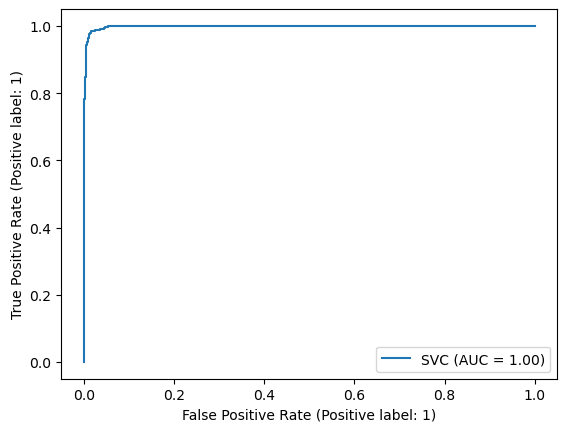

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm,X_test,y_test)

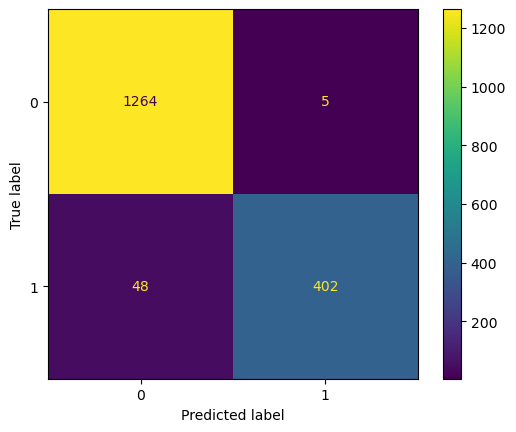

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm,X_test,y_test)

- Here, Out of 1719 test data 42 are misclassified. Accuracy of the model is 98%.

- **Accuracy using Cross Validation**

In [35]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(svm,message_bow,df_email['Spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 97.85256483534909  %


## NaiveBayesMultinomial Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
y_pred = nb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1269
           1       0.97      1.00      0.98       450

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



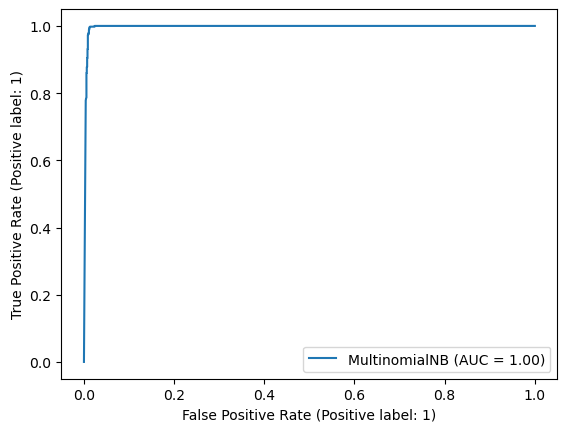

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

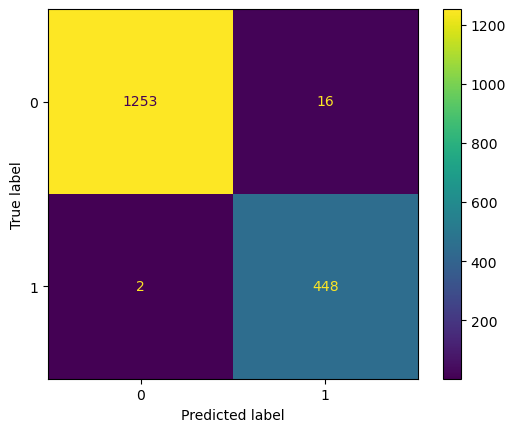

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

- Here, Out of 1719 test data 17 are misclassified. Accuracy of the model is 99%.

- **Accuracy using Cross Validation**

In [41]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df_email['Spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 99.0222913189602  %
